In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision
from torchvision.datasets import CIFAR100
from torchvision.transforms import ToTensor

In [2]:
batch_size = 32
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
transforms = ToTensor()
dataset = CIFAR100(root='../../data/.', download=True, transform=transforms)

Files already downloaded and verified


In [4]:
dataloader = DataLoader(dataset, batch_size=32)

In [5]:
class Conv_AE(nn.Module):
    def __init__(self):
        super(Conv_AE, self).__init__()
        # Input size: [batch, 3, 32, 32]
        # Output size: [batch, 3, 32, 32]
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 12, 4, stride=2, padding=1),            # [batch, 12, 16, 16]
            nn.BatchNorm2d(12),
            nn.ReLU(),
            nn.Conv2d(12, 24, 4, stride=2, padding=1),           # [batch, 24, 8, 8]
            nn.BatchNorm2d(24),
            nn.ReLU(),
			nn.Conv2d(24, 48, 4, stride=2, padding=1),           # [batch, 48, 4, 4]
            nn.BatchNorm2d(48),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
			nn.ConvTranspose2d(48, 24, 4, stride=2, padding=1),  # [batch, 24, 8, 8]
            nn.BatchNorm2d(24),
            nn.ReLU(),
			nn.ConvTranspose2d(24, 12, 4, stride=2, padding=1),  # [batch, 12, 16, 16]
            nn.BatchNorm2d(12),
            nn.ReLU(),
            nn.ConvTranspose2d(12, 3, 4, stride=2, padding=1),   # [batch, 3, 32, 32]
            nn.BatchNorm2d(3),
            nn.Sigmoid(),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [6]:
def train(model, trainloader, epochs):
    params = model.parameters()
    optim = torch.optim.Adam(params, lr=1e-3)
    criterion = nn.MSELoss()
    for epochs in range(epochs):
        train_loss = 0
        for batch, (x,y) in enumerate(trainloader):
            x = x.to(device)
            y = y.to(device)
            # 1. Forward pass
            recon_batch = model(x)
            
            # 2. Calculate loss
            loss = criterion(recon_batch, x)
            
            train_loss += loss.item()

            # 3. Zero grad
            optim.zero_grad()

            # 4. Backprop
            loss.backward()

            # 5. Step
            optim.step()
        print('train_loss: ', train_loss / len(trainloader))
        print(f'epoch {epochs} completed !')

In [7]:
ae = Conv_AE().to(device)

In [8]:
train(ae, dataloader, 50)

train_loss:  0.009448606434492102
epoch 0 completed !
train_loss:  0.0043702219973091256
epoch 1 completed !
train_loss:  0.0035215646038350298
epoch 2 completed !
train_loss:  0.003062477353954317
epoch 3 completed !
train_loss:  0.00285116508731205
epoch 4 completed !
train_loss:  0.0026909078194140693
epoch 5 completed !
train_loss:  0.002554516182879912
epoch 6 completed !
train_loss:  0.002428989173914172
epoch 7 completed !
train_loss:  0.0023352723888652453
epoch 8 completed !
train_loss:  0.0022700160371779596
epoch 9 completed !
train_loss:  0.0022165658344500965
epoch 10 completed !
train_loss:  0.0021679444599483145
epoch 11 completed !
train_loss:  0.002120796580913924
epoch 12 completed !
train_loss:  0.0020759257335115702
epoch 13 completed !
train_loss:  0.0020375360048185947
epoch 14 completed !
train_loss:  0.0020052554799834896
epoch 15 completed !
train_loss:  0.0019763803409093123
epoch 16 completed !
train_loss:  0.001949675065380064
epoch 17 completed !
train_loss

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

batch = next(iter(dataloader))

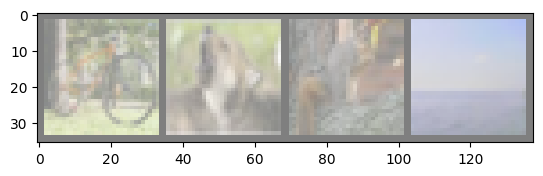

In [10]:
imshow(torchvision.utils.make_grid(batch[0][16:20]))

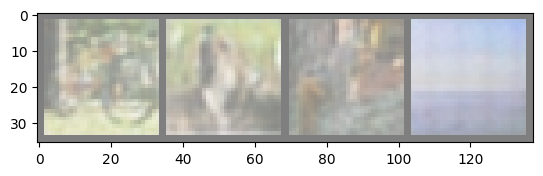

In [11]:
reconstruction = ae(batch[0].cuda())
imshow(torchvision.utils.make_grid(reconstruction[16:20].detach().cpu()))

In [12]:
torch.save(ae.state_dict(), 'pre-trained-ae-cifar100.pt')

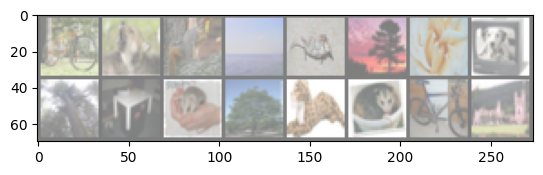

In [13]:
imshow(torchvision.utils.make_grid(batch[0][16:32]))

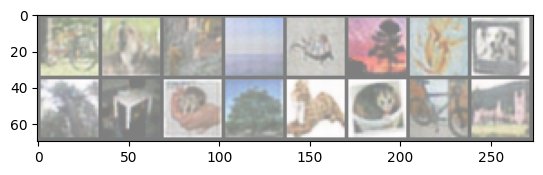

In [14]:
imshow(torchvision.utils.make_grid(reconstruction[16:32].detach().cpu()))